# Boss 2

## Atividade desenvolvida originalmente do repositório de Jean Pierre, acesse [aqui](https://github.com/JPTR2189/gc-python-2024).

## Análise Exploratória Avançada e Storytelling com Visualizações:
Agora que seus dados do Boss 1 foram limpos e unificados, você realizará uma análise profunda usando visualizações complexas e storytelling para guiar a interpretação dos resultados.
Lembre-se, o objetivo é gerar insights e tomar decisões baseadas nas visualizações e na exploração dos dados.
### Número de Pokémon por geração:
* Crie uma visualização que mostre o número de Pokémon por geração, mas vá além de um gráfico simples de barras.
* Experimente combinar um gráfico de barras com uma linha que exiba a média de 'attack', 'defense' e 'speed' por geração. Utilize o Plotly para criar uma visualização interativa.
* Analise a distribuição de Pokémon ao longo das gerações. Há tendências ou mudanças significativas na força dos Pokémon entre as gerações? Como isso pode estar relacionado à história ou ao design do jogo em cada geração?
### Distribuição dos Atributos 'Attack', 'Defense' e 'Speed' por Tipo de Pokémon ('type_1'):
 - Utilize um boxplot para visualizar a distribuição de 'attack', 'defense' e 'speed' para cada tipo de Pokémon. 
 - Considere criar gráficos separados para cada atributo.  
 - Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'? 
 - Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?
### Seleção de Pokémon para a Bolsa:
Simule a situação na qual você receberá 3 Pokémon de 10 tipos diferentes, selecionados aleatoriamente. Desses 30 Pokémon, você deve automatizar a seleção de 6 Pokémon para a sua bolsa com base em um critério otimizado.
Para isso, utilize uma métrica ponderada que leve em consideração os atributos attack, defense, speed e as colunas de against, aplicando pesos customizados para cada critério. Além disso, a equipe final deve conter tipos variados, sem repetição de tipos.
Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon selecionados.
### Seleção de Pokémon para a Bolsa:
Justifique a seleção dos 6 Pokémon, explicando como os critérios otimizados ajudaram a montar uma equipe equilibrada.
Discuta os trade-offs entre atributos ofensivos e defensivos, além das resistências e fraquezas de cada Pokémon contra outros tipos.
A sua equipe final é equilibrada ou focada em certos atributos? Explique como sua análise influenciou essa decisão estratégica.
### Análise de Forças e Fraquezas:
Depois de selecionar os 6 Pokémon, analise detalhadamente suas forças e fraquezas.
Utilize as colunas de ‘against’ para calcular um índice de força total para cada Pokémon contra todos os outros tipos e produza um gráfico radar (spider plot) para cada um dos 6 Pokémon. Além disso, crie uma matriz de calor (heatmap) que mostre as fraquezas mais críticas da sua equipe.
Analise as vulnerabilidades e vantagens da sua equipe em potencial. Explique se a equipe é bem balanceada contra adversários ou se possui fraquezas notáveis. Como isso afeta suas chances em uma batalha hipotética?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
df=pd.read_csv("pokedexB1.csv")
df

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,type_2,total_points,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,318.0,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,405.0,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,525.0,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,Fire,309.0,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
4,5,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,Fire,405.0,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1023,888,Zacian Hero of Many Battles,8,Legendary,Warrior Pokémon,1,Fairy,Fairy,670.0,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
973,1024,889,Zamazenta Crowned Shield,8,Legendary,Warrior Pokémon,2,Fighting,Steel,720.0,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
974,1025,889,Zamazenta Hero of Many Battles,8,Legendary,Warrior Pokémon,1,Fighting,Fighting,670.0,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
975,1026,890,Eternatus,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,690.0,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


### Número de Pokémon por geração: (Guilherme)
* Crie uma visualização que mostre o número de Pokémon por geração, mas vá além de um gráfico simples de barras.
* Experimente combinar um gráfico de barras com uma linha que exiba a média de 'attack', 'defense' e 'speed' por geração. Utilize o Plotly para criar uma visualização interativa.
* Analise a distribuição de Pokémon ao longo das gerações. Há tendências ou mudanças significativas na força dos Pokémon entre as gerações? Como isso pode estar relacionado à história ou ao design do jogo em cada geração?

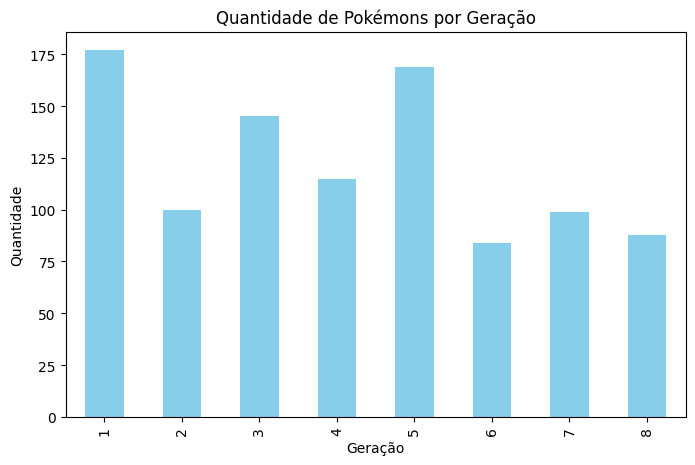

In [12]:
#Crie uma visualização que mostre o número de Pokémon por geração, mas vá além de um gráfico simples de barras.
contagemGeracao=df['generation'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
contagemGeracao.plot(kind='bar', color='skyblue')

plt.title('Quantidade de Pokémons por Geração')
plt.xlabel('Geração')
plt.ylabel('Quantidade')

plt.show()

In [13]:
df.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'generation', 'status',
       'species', 'type_number', 'type_1', 'type_2', 'total_points', 'hp',
       'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'growth_rate',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

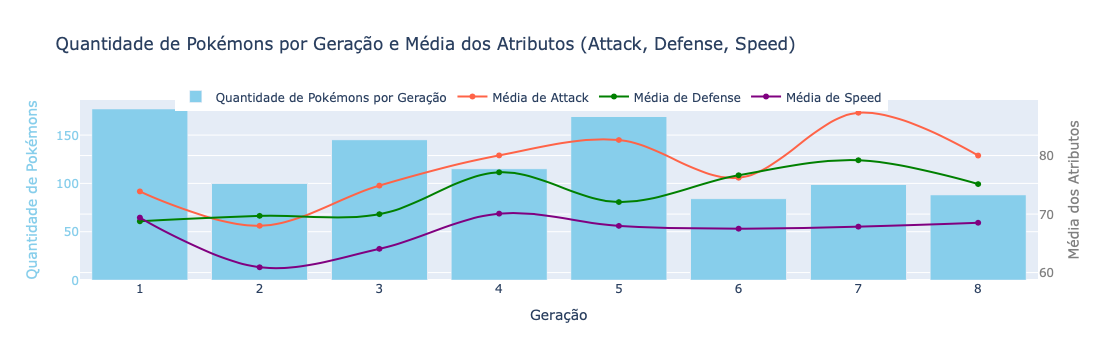

In [14]:
#Experimente combinar um gráfico de barras com uma linha que exiba a média de 'attack', 'defense' e 'speed' por geração. Utilize o Plotly para criar uma visualização interativa.

media_atributos = df.groupby('generation')[['attack', 'defense', 'speed']].mean()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=contagemGeracao.index,
        y=contagemGeracao.values,
        name='Quantidade de Pokémons por Geração',
        marker_color='skyblue',
        yaxis='y1'  
    )
)

colors = {'attack': 'tomato', 'defense': 'green', 'speed': 'purple'}
for atributo in ['attack', 'defense', 'speed']:
    fig.add_trace(
        go.Scatter(
            x=media_atributos.index,
            y=media_atributos[atributo],
            mode='lines+markers',
            name=f'Média de {atributo.capitalize()}',
            line_shape='spline',
            line=dict(color=colors[atributo]),
            yaxis='y2'  
        )
    )

fig.update_layout(
    title='Quantidade de Pokémons por Geração e Média dos Atributos (Attack, Defense, Speed)',
    xaxis_title='Geração',
    yaxis=dict(
        title='Quantidade de Pokémons',
        titlefont=dict(color='skyblue'),
        tickfont=dict(color='skyblue'),
        side='left'
    ),
    yaxis2=dict(
        title='Média dos Atributos',
        titlefont=dict(color='gray'),
        tickfont=dict(color='gray'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    legend=dict(
        x=0.1, y=1.1,
        orientation="h"
    )
)

fig.show()

### Analise a distribuição de Pokémon ao longo das gerações. Há tendências ou mudanças significativas na força dos Pokémon entre as gerações? Como isso pode estar relacionado à história ou ao design do jogo em cada geração?

Ao analisarmos a distribuição de Pokémons ao longo das gerações e a média dos atributos de attack, defense, e speed, identificamos padrões e mudanças que refletem a evolução e forma como são utilizados.

Geração 1: Contendo 177 Pokémons, a média de attack é de 73.87, defense de 68.77 e speed de 69.39. Esse equilíbrio de atributos mostra o foco inicial em uma utilização sem muita intensidade, onde os Pokémons são projetados para funcionar em um contexto geral de aventura e exploração.

Geração 2: Com 100 novos Pokémons, a média de attack cai para 67.99, enquanto defense ligeiramente aumenta para 69.69, e speed diminui para 60.91. Esse decréscimo em atributos ofensivos e de velocidade sugere um foco em estratégias defensivas.

Geração 3: Nesta geração, que conta com 145 Pokémons, os valores médios aumentam para 74.86 em attack, com defense de 69.99 e speed de 64.06. Isso representa uma mudança em direção a batalhas mais intensas, com um ligeiro aumento nos atributos de ataque.

Geração 4: Com 115 novos Pokémons, há um aumento notável para 80.03 em attack, 77.14 em defense, e 70.07 em speed. Esses aumentos são os mais consistentes até o momento e refletem uma ênfase em tornar os Pokémons mais poderosos e versáteis.

Geração 5: A maior geração em número, com 169 Pokémons, mantém os valores elevados, com attack médio de 82.66 e defense de 72.05. No entanto, a speed reduz levemente para 67.98. Essa geração demonstra um investimento em atributos ofensivos e defensivos robustos, permitindo batalhas mais complexas e uma gama de estratégias defensivas e ofensivas.

Geração 6: Apesar de contar com apenas 84 Pokémons, essa geração mantém a força com attack de 76.20, defense de 76.63 e speed de 67.5. Com uma quantidade menor de Pokémons novos, a concepção parece ter focado em diversificar as funções de combate, introduzindo Mega Evoluções para fortalecer Pokémons existentes.

Geração 7: Esta geração de 99 Pokémons apresenta o maior attack médio até agora, com 87.31, defense de 79.20 e speed de 67.85. Esses valores elevados refletem um foco em Pokémons com atributos altos e especializados, talvez para diversificar as opções de combate e manter o interesse dos jogadores na variedade estratégica.

Geração 8: A última geração conta com 88 Pokémons, mantendo um alto attack médio de 80.0, defense de 75.13 e speed de 68.51. Essa geração apresenta valores balanceados e a introdução da mecânica de Dynamax, que temporariamente melhora atributos em combate, refletindo a inovação contínua do design para atrair e engajar novos jogadores e competidores.


As flutuações nos atributos médios ao longo das gerações evidenciam uma evolução que busca equilibrar força e estratégia em resposta ao feedback da comunidade e ao cenário competitivo. Em cada geração, o design dos Pokémons é ajustado para criar experiências de jogo mais dinâmicas e diversificadas.

## Distribuição dos Atributos 'Attack', 'Defense' e 'Speed' por Tipo de Pokémon ('type_1'): (Jean) 
 - Utilize um boxplot para visualizar a distribuição de 'attack', 'defense' e 'speed' para cada tipo de Pokémon. 
 - Considere criar gráficos separados para cada atributo.  
 - Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'? 
 - Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?

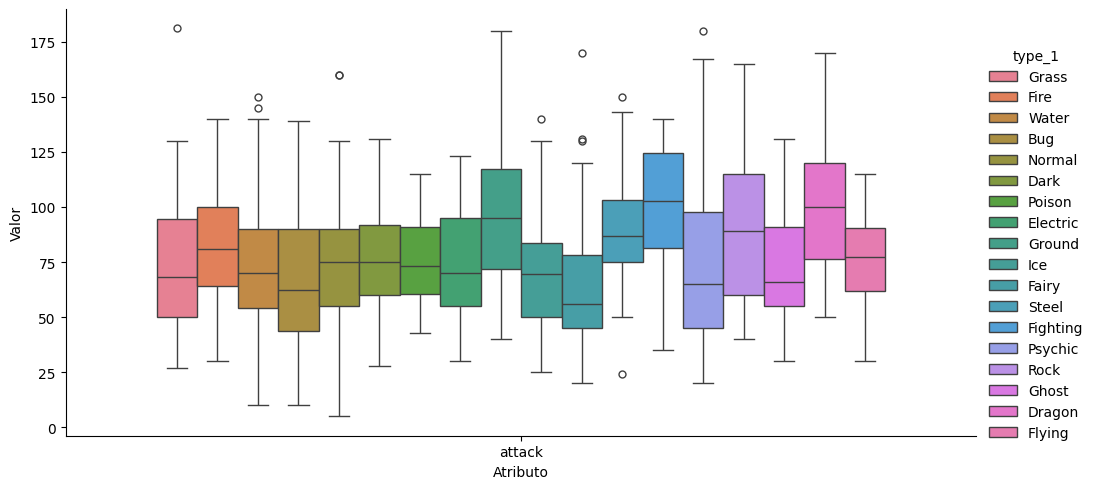

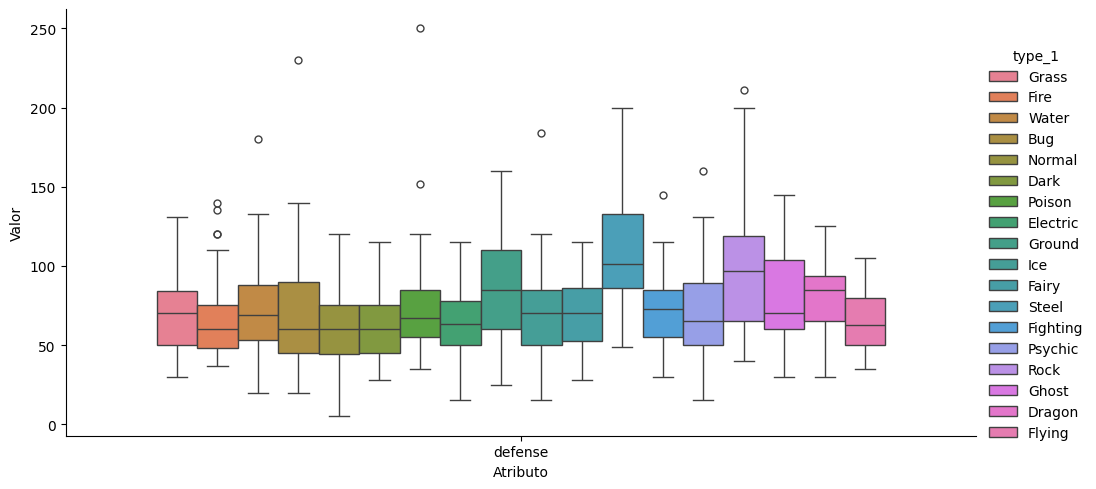

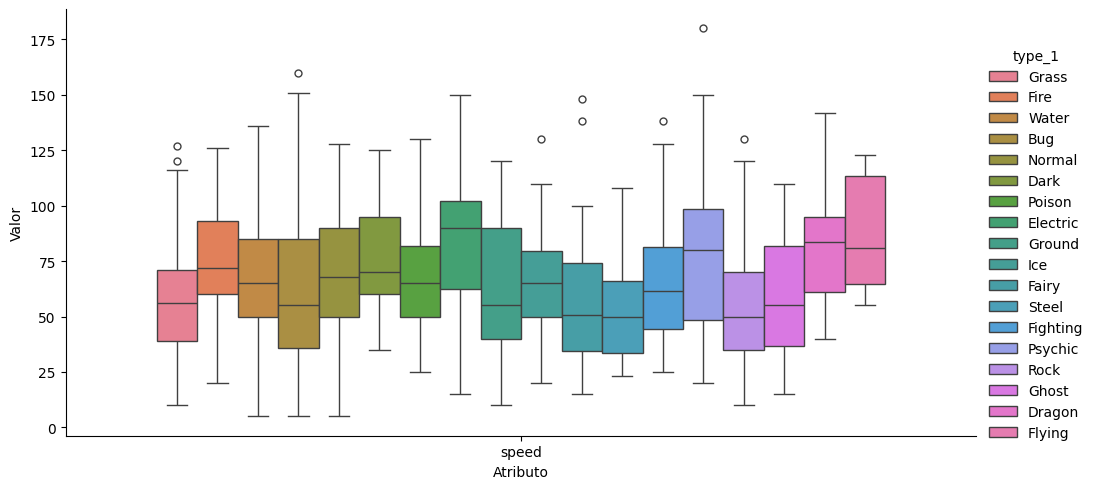

In [15]:
media_atributos_pokemon = df.groupby('type_1')[['attack', 'defense', 'speed']].mean()

df_melted = df.melt(id_vars='type_1', value_vars=['attack', 'defense', 'speed'],
                  var_name='Atributo', value_name='Valor')


atributos = ['attack', 'defense', 'speed']


for atributo in atributos:
    
    dado_atributo = df_melted[df_melted['Atributo'] == atributo]
        
    sns.catplot(data=dado_atributo,
               x='Atributo',
               y='Valor',
               hue='type_1',
               kind='box',
               height=5, 
               aspect=2,
              )




plt.show()

### Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'?

**Maior:** Os pokemóns do tipo '*Bug*' tem tendência a ter os valores maiores, pois nos 3 atributos ele se manteve com uma média linear e alta

**Menor:** Usando assim também o mesmo parâmetro, Os pokemóns do tipo '*Rock*' tem tendência a ter os valores maiores, pois nos 3 atributos ele se manteve com uma média linear e alta


### Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?
**Os tipos abaixo são notalvementes equilibrados pois possuem os seus elementos em geral equilibrados de forma linear:**

- Fire *(attack)*

- Eletric *(defense)*

- Ice *(speed)*

## Seleção de Pokémon para a Bolsa - Matheus

In [16]:
pesos = {
    'attack': 0.4,
    'defense': 0.4,
    'speed': 0.3
}

df_simulado = pd.concat([df]*7, ignore_index=True).sample(30, replace=True, random_state=42).reset_index(drop=True)

df_simulado['pontuacao_ponderada'] = (
    df_simulado['attack'] * pesos['attack'] +
    df_simulado['defense'] * pesos['defense'] +
    df_simulado['speed'] * pesos['speed']
)

pokemon_maior_pontuacao_por_tipo = df_simulado.loc[
    df_simulado.groupby('type_1')['pontuacao_ponderada'].idxmax()
].sort_values(by='pontuacao_ponderada', ascending=False)

selecao = pokemon_maior_pontuacao_por_tipo[['pokedex_number', 'name', 'type_1', 'attack', 'defense', 'speed', 'pontuacao_ponderada']].head(6)
selecao

,pokedex_number,name,type_1,attack,defense,speed,pontuacao_ponderada
0,784,Kommo-o,Dragon,110.0,125.0,85.0,119.5
23,141,Kabutops,Rock,115.0,105.0,80.0,112.0
17,652,Chesnaught,Grass,107.0,122.0,64.0,110.8
4,766,Passimian,Fighting,120.0,90.0,80.0,108.0
13,477,Dusknoir,Ghost,100.0,135.0,45.0,107.5
11,642,Thundurus Therian Forme,Electric,105.0,70.0,101.0,100.3


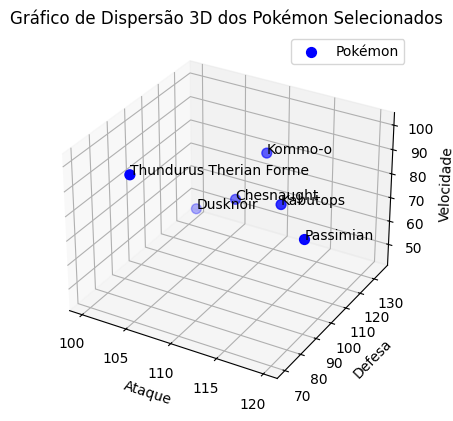

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    selecao['attack'],
    selecao['defense'],
    selecao['speed'],
    c='blue', marker='o', s=50, label='Pokémon'
)

ax.set_xlabel('Ataque')
ax.set_ylabel('Defesa')
ax.set_zlabel('Velocidade')
ax.set_title('Gráfico de Dispersão 3D dos Pokémon Selecionados')

for i, row in selecao.iterrows():
    ax.text(row['attack'], row['defense'], row['speed'], row['name'])

plt.legend()
plt.show()


# Justificativas e Análises
Minha seleção foi feita através de uma pontuação ponderada, considerando os atributos de ataque, defesa e velocidade, com pesos de 0,4 para ataque, 0,3 para defesa e 0,3 para velocidade. Com isso consegui selecionar o pokemon de maior pontuação de cada tipo, garantindo que minha seleção seria a melhor possivel sem repetir o tipo de pokemon.

Considerei o atributo ataque com maior peso, pois, acho mais divertido atacar do que se defender, por isso, optei por uma equipe mais ofesiva mas ainda sim considerei defesa e velocidade com grande importancia, tornando assim a minha equipe mais equilibrada.

# Avaliação de cada pokemon -
Kommo-o (Tipo Dragon)
Atributos: Alto equilíbrio entre ataque (110) e defesa (125), com uma boa velocidade (85), permitindo versatilidade. Resistências/Fraquezas: Resistente a Fogo, Água, Elétrico e Planta, mas vulnerável a Fada, Gelo e Dragão, tornando-o um tanque eficaz com algumas fraquezas estratégicas.

## Kabutops (Tipo Rock)
Atributos: Forte ofensiva (115) e defesa sólida (105), mas velocidade moderada (80), adequado para ataques rápidos, embora não seja excepcionalmente rápido. Resistências/Fraquezas: Resistente a Fogo e Voador, mas vulnerável a Planta, Água e Lutador, expondo riscos contra adversários de tipos específicos.

## Chesnaught (Tipo Grass)
Atributos: Defensivo robusto (122) e ataque elevado (107), porém com velocidade baixa (64), funcionando bem como defensor que absorve golpes. Resistências/Fraquezas: Resiste a Água e Terra, mas fraco contra Fogo e Voador, focado em resistência com algumas limitações.

## Passimian (Tipo Fighting)
Atributos: Muito ofensivo (120) com defesa razoável (90) e velocidade média (80), ideal para ataques diretos. Resistências/Fraquezas: Resiste a Rocha e Inseto, mas vulnerável a Fada e Psíquico, fazendo dele um atacante rápido, embora suscetível a ameaças específicas.

## Dusknoir (Tipo Ghost)
Atributos: Defesa alta (135) e ataque sólido (100), porém baixa velocidade (45), funcionando como um tanque defensivo. Resistências/Fraquezas: Resiste a Normal e Lutador, mas é vulnerável a Fantasma e Sombrio, excelente para resistência, embora lento.

## Thundurus Therian Forme (Tipo Electric)
Atributos: Foco em velocidade (101) com ataque alto (105) e defesa baixa (70), voltado para ofensivas rápidas. Resistências/Fraquezas: Resistente a Voador e Aço, mas vulnerável a Terra e Gelo, ideal para ataques velozes, porém suscetível a adversários de certos tipos. Essa equipe traz um bom equilíbrio entre ataque e defesa, com uma variedade de tipos que cobre várias fraquezas.

# Análise de Forças e Fraquezas: (Henrike)
Depois de selecionar os 6 Pokémon, analise detalhadamente suas forças e fraquezas.
Utilize as colunas de ‘against’ para calcular um índice de força total para cada Pokémon contra todos os outros tipos e produza um gráfico radar (spider plot) para cada um dos 6 Pokémon. Além disso, crie uma matriz de calor (heatmap) que mostre as fraquezas mais críticas da sua equipe.
Analise as vulnerabilidades e vantagens da sua equipe em potencial. Explique se a equipe é bem balanceada contra adversários ou se possui fraquezas notáveis. Como isso afeta suas chances em uma batalha hipotética?

## Calcular o Índice de Força Total

In [18]:

selecao = df[df['name'].isin(['Kommo-o', 'Kabutops', 'Chesnaught', 'Passimian', 'Dusknoir', 'Thundurus Therian Forme'])].copy()


against_cols = [col for col in df.columns if col.startswith('against_')]


for col in against_cols:
    tipo = col.replace('against_', '')
    selecao[f'strength_{tipo}'] = selecao[col] * selecao['attack'] * selecao['defense'] * selecao['speed']

# Calculando a força total e selecionando colunas relevantes
selecao['total_strength'] = selecao[[f'strength_{col.replace("against_", "")}' for col in against_cols]].sum(axis=1)
selecao = selecao[['name', 'type_1', 'attack', 'defense', 'speed', 'total_strength'] + against_cols + [f'strength_{col.replace("against_", "")}' for col in against_cols]]
selecao


,name,type_1,attack,defense,speed,total_strength,against_normal,against_fire,against_water,against_electric,...,strength_ground,strength_flying,strength_psychic,strength_bug,strength_rock,strength_ghost,strength_dragon,strength_dark,strength_steel,strength_fairy
166,Kabutops,Rock,115.0,105.0,80.0,20527500.0,0.5,0.25,1.0,2.0,...,1932000.0,483000.0,966000.0,966000.0,966000.0,966000.0,966000.0,966000.0,966000.0,966000.0
513,Dusknoir,Ghost,100.0,135.0,45.0,10327500.0,0.0,1.00,1.0,1.0,...,607500.0,607500.0,607500.0,303750.0,607500.0,1215000.0,607500.0,1215000.0,607500.0,607500.0
693,Thundurus Therian Forme,Electric,105.0,70.0,101.0,11506425.0,1.0,1.00,1.0,0.0,...,0.0,371175.0,742350.0,371175.0,1484700.0,742350.0,742350.0,742350.0,371175.0,742350.0
708,Chesnaught,Grass,107.0,122.0,64.0,19215488.0,1.0,2.00,0.5,0.5,...,417728.0,3341824.0,1670912.0,835456.0,417728.0,835456.0,835456.0,417728.0,835456.0,1670912.0
841,Passimian,Fighting,120.0,90.0,80.0,16848000.0,1.0,1.00,1.0,1.0,...,864000.0,1728000.0,1728000.0,432000.0,432000.0,864000.0,864000.0,432000.0,864000.0,1728000.0
860,Kommo-o,Dragon,110.0,125.0,85.0,25128125.0,1.0,0.50,0.5,0.5,...,1168750.0,2337500.0,2337500.0,584375.0,584375.0,1168750.0,2337500.0,584375.0,1168750.0,4675000.0


## Gráficos Radar (Spider Plot)

In [19]:
import plotly.express as px

for i, pokemon in selecao.iterrows():
    categorias = [col.replace('against_', '') for col in against_cols]
    valores = [pokemon[col] for col in against_cols]

    # Criando gráfico radar usando Plotly Express
    fig = px.line_polar(r=valores, theta=categorias, line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title=f'Radar Plot para {pokemon["name"]}')
    fig.show()


## Matriz de Calor (Heatmap)

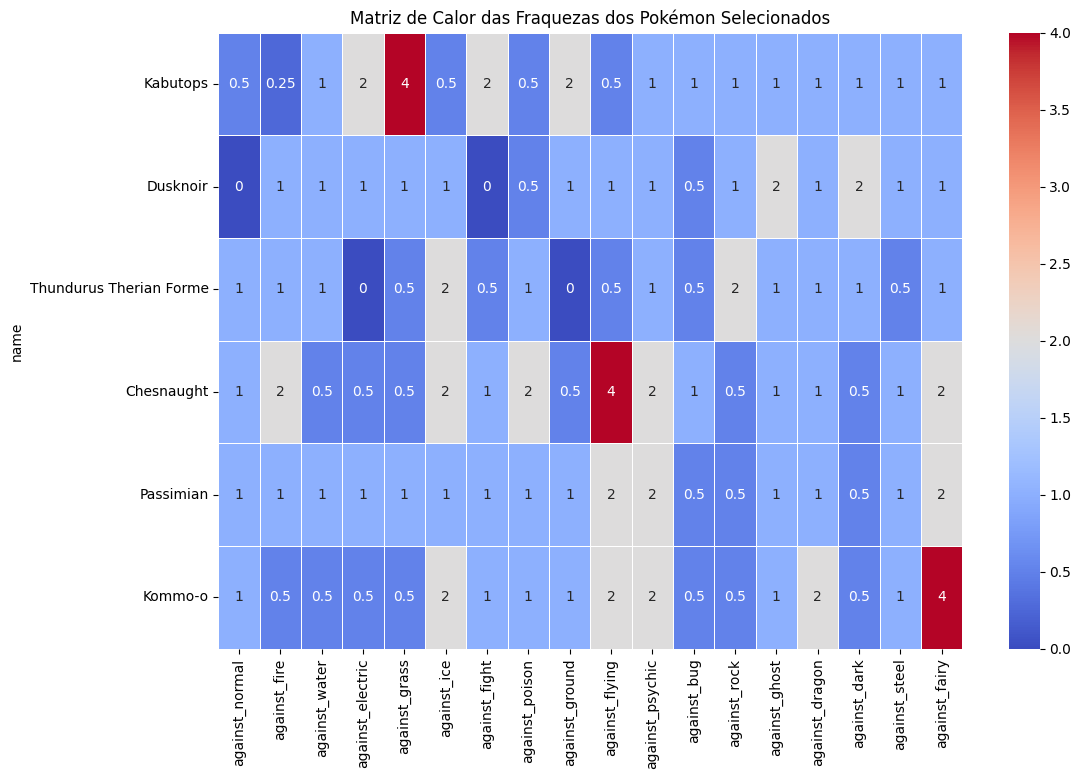

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando a matriz de calor das fraquezas
fraquezas = selecao[against_cols]
fraquezas.index = selecao['name']

plt.figure(figsize=(12, 8))
sns.heatmap(fraquezas, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Calor das Fraquezas dos Pokémon Selecionados')
plt.show()


## Análise de Forças e Fraquezas da Equipe de Pokémon

### Vantagens

1. **Kommo-o (Tipo Dragon)**
   - **Vantagens:** Alto equilíbrio entre ataque (110) e defesa (125), com uma boa velocidade (85). Resistências a Fogo, Água, Elétrico e Planta tornam-no versátil.
   - **Desempenho:** Funciona bem como um tanque eficaz que pode resistir a diversos tipos de ataques.

2. **Kabutops (Tipo Rock)**
   - **Vantagens:** Forte ofensiva (115) e defesa sólida (105). Resistências a Fogo e Voador proporcionam um bom equilíbrio defensivo.
   - **Desempenho:** Adequado para ataques rápidos e para enfrentar oponentes de tipos específicos.

3. **Chesnaught (Tipo Grass)**
   - **Vantagens:** Defensivo robusto (122) e ataque elevado (107). Resistências a Água e Terra aumentam sua durabilidade em combate.
   - **Desempenho:** Funciona bem como um defensor que pode absorver golpes e retaliar eficientemente.

4. **Passimian (Tipo Fighting)**
   - **Vantagens:** Muito ofensivo (120) com defesa razoável (90) e velocidade média (80). Resistências a Rocha e Inseto.
   - **Desempenho:** Ideal para ataques diretos e rápidos, aproveitando-se de sua alta ofensiva.

5. **Dusknoir (Tipo Ghost)**
   - **Vantagens:** Defesa alta (135) e ataque sólido (100). Resistências a Normal e Lutador.
   - **Desempenho:** Excelente para resistência, absorvendo muitos golpes devido à sua alta defesa.

6. **Thundurus Therian Forme (Tipo Electric)**
   - **Vantagens:** Foco em velocidade (101) com ataque alto (105). Resistências a Voador e Aço.
   - **Desempenho:** Ideal para ofensivas rápidas, usando sua alta velocidade para atacar rapidamente.

### Vulnerabilidades

1. **Kommo-o**
   - **Fraquezas:** Vulnerável a Fada, Gelo e Dragão, que são tipos comuns e potencialmente devastadores.

2. **Kabutops**
   - **Fraquezas:** Suscetível a ataques de Planta, Água e Lutador, limitando seu desempenho contra esses tipos.

3. **Chesnaught**
   - **Fraquezas:** Fraco contra Fogo e Voador, que podem explorar suas vulnerabilidades defensivas.

4. **Passimian**
   - **Fraquezas:** Vulnerável a Fada e Psíquico, que podem causar danos significativos rapidamente.

5. **Dusknoir**
   - **Fraquezas:** Suscetível a Fantasma e Sombrio, expondo-o a riscos contra esses tipos específicos.

6. **Thundurus Therian Forme**
   - **Fraquezas:** Fraco contra Terra e Gelo, que podem anular sua alta velocidade.

### Equilíbrio da Equipe

A equipe é razoavelmente equilibrada, com uma boa combinação de ataque, defesa e velocidade. A diversidade de tipos ajuda a cobrir várias fraquezas, mas algumas vulnerabilidades notáveis permanecem, especialmente contra tipos Fada e Gelo.

### Impacto em Batalhas Hipotéticas

- **Forças:** A equipe pode aproveitar suas altas capacidades ofensivas e defensivas para enfrentar uma ampla gama de oponentes. A combinação de ataques rápidos e defesas robustas permite estratégias flexíveis.
- **Fraquezas:** As vulnerabilidades contra tipos Fada, Gelo e outros específicos podem ser exploradas por adversários bem preparados, exigindo uma abordagem estratégica para mitigar esses riscos.

### Conclusão

Em uma batalha hipotética, a equipe tem boas chances de sucesso, desde que suas fraquezas sejam gerenciadas de forma eficaz. A variedade de tipos e atributos proporciona um equilíbrio geral, mas atenção especial deve ser dada aos tipos que representam maior ameaça.
